<a href="https://colab.research.google.com/github/honggi82/computer_vision/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

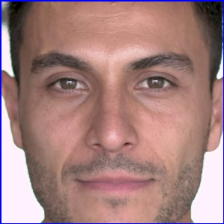

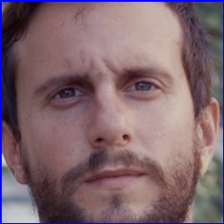

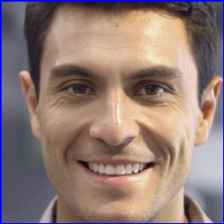

0
1
2


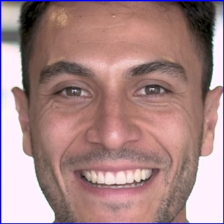

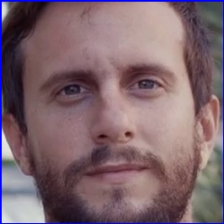

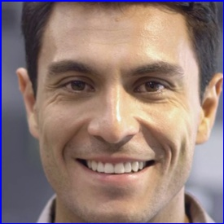

0
1
2
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 3)                 188163    
                                                                 
Total params: 2,446,147
Trainable params: 188,163
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
38/38 [==============================] - 35s 262ms/step - loss: 0.3456 - accuracy: 0.9700
Epoch 2/5
38/38 [==============================] - 10s 261ms/step - loss: 4.0134e-08 - accuracy: 1.0000
Epoch 3/5
38/38 [=========

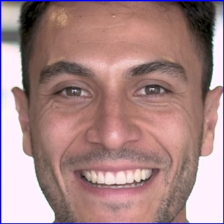

10/10 [==============================] - 10s 903ms/step
Prediction: [9.9999994e-01 1.8639112e-22 3.4286903e-21]
Real: [1. 0. 0.]


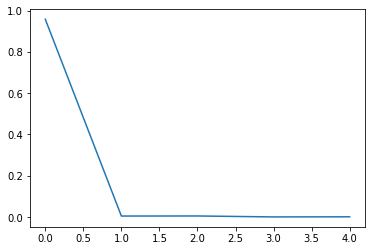

In [29]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten, Dense
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import MobileNetV2
from keras.optimizers import Adam

# image data
train_X=[]; test_X=[]; train_Y=[]; test_Y=[]; 

for i in range(0,100):
    img=cv2.imread("/content/drive/MyDrive/Computer_Vision/face0_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(224, 224)))
    train_Y.append(0)
    img=cv2.imread("/content/drive/MyDrive/Computer_Vision/face1_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(224, 224)))
    train_Y.append(1)
    img=cv2.imread("/content/drive/MyDrive/Computer_Vision/face2_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(224, 224)))
    train_Y.append(2)

train_X=np.array(train_X)
train_Y=np.array(train_Y)

# plot sample train_X images and print corresponding labels
cv2_imshow(train_X[0]); cv2_imshow(train_X[1]); cv2_imshow(train_X[2]);
print(train_Y[0]); print(train_Y[1]); print(train_Y[2]);

for i in range(100,200):
    img=cv2.imread("/content/drive/MyDrive/Computer_Vision/face0_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(224, 224)))
    test_Y.append(0)
    img=cv2.imread("/content/drive/MyDrive/Computer_Vision/face1_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(224, 224)))
    test_Y.append(1)
    img=cv2.imread("/content/drive/MyDrive/Computer_Vision/face2_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(224, 224)))
    test_Y.append(2)
test_X=np.array(test_X)
test_Y=np.array(test_Y)

# plot sample test_X images and print corresponding labels
cv2_imshow(test_X[0]); cv2_imshow(test_X[1]); cv2_imshow(test_X[2]); 
print(test_Y[0]); print(test_Y[1]); print(test_Y[2]);

# normalization
train_X = train_X.astype('float32')/255.0 
test_X = test_X.astype('float32')/255.0

# One-Hot Encoding
train_Y = np_utils.to_categorical(train_Y) 
test_Y = np_utils.to_categorical(test_Y) 

pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

# Training
history=model.fit(train_X, train_Y, batch_size=8, epochs=5) 

# Fine tuning
pretrained_model.trainable = True
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])
history=model.fit(train_X, train_Y, batch_size=8, epochs=5) 

# Testing
_, accuracy = model.evaluate(test_X, test_Y)
print('Accuracy: ', accuracy)

# Plotting the loss
plt.plot(history.history['loss'], label='loss')

model.evaluate(test_X,test_Y)

trial=0
cv2_imshow(test_X[trial]*255);
pred=model.predict(test_X)
print("Prediction: " + str(pred[trial]))
print("Real: " + str(test_Y[trial]))